In [33]:
%load_ext autoreload
%autoreload 2

! pip install -i https://test.pypi.org/simple/ my-krml-24925125==0.1.9

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Looking in indexes: https://test.pypi.org/simple/
  Attempting uninstall: my-krml-24925125
    Found existing installation: my-krml-24925125 0.1.8
    Uninstalling my-krml-24925125-0.1.8:
      Successfully uninstalled my-krml-24925125-0.1.8


## Data loading and exploration

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("../data/raw/CVD_cleaned.csv")

In [4]:
df.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [5]:
df.shape

(308854, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [7]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


## Data preparation

In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

In [9]:
df_cleaned = df.copy()

In [10]:
ord_cols = ["Age_Category", "General_Health", "Checkup"]
num_cols = df_cleaned.select_dtypes(np.number).columns.to_list()
cat_cols = list(set(df_cleaned.columns).difference(num_cols + ord_cols))

In [11]:
std_scaler = StandardScaler()
num_features = std_scaler.fit_transform(df_cleaned[num_cols])
num_features = pd.DataFrame(num_features, columns=num_cols)

ohe_encoder = OneHotEncoder(drop="first", dtype=int, sparse_output=False)
cat_features = ohe_encoder.fit_transform(df_cleaned[cat_cols])
cat_features = pd.DataFrame(cat_features, columns=ohe_encoder.get_feature_names_out())

In [12]:
for col in ord_cols:
    print(f"{col} values:\n{sorted(df_cleaned[col].unique())}")

Age_Category values:
['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
General_Health values:
['Excellent', 'Fair', 'Good', 'Poor', 'Very Good']
Checkup values:
['5 or more years ago', 'Never', 'Within the past 2 years', 'Within the past 5 years', 'Within the past year']


In [13]:
ord_age_encoder = OrdinalEncoder(
    categories=[['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']],
    dtype=int,
)
ord_age_feature = ord_age_encoder.fit_transform(df_cleaned["Age_Category"].values.reshape(-1, 1))
ord_age_feature = pd.DataFrame(ord_age_feature, columns=["Age_Category"])

In [14]:
ord_health_encoder = OrdinalEncoder(
    categories=[['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']],
    dtype=int,
)
ord_health_feature = ord_health_encoder.fit_transform(df_cleaned["General_Health"].values.reshape(-1, 1))
ord_health_feature = pd.DataFrame(ord_health_feature, columns=["General_Health"])

In [15]:
ord_checkup_encoder = OrdinalEncoder(
    categories=[['Never', 'Within the past year', 'Within the past 2 years', 'Within the past 5 years', '5 or more years ago']],
    dtype=int,
)
ord_checkup_feature = ord_checkup_encoder.fit_transform(df_cleaned["Checkup"].values.reshape(-1, 1))
ord_checkup_feature = pd.DataFrame(ord_checkup_feature, columns=["Checkup"])

In [16]:
features = pd.concat([num_features, cat_features, ord_age_feature, ord_health_feature, ord_checkup_feature], axis=1)

In [17]:
features.to_parquet("../data/interim/features.parquet")

In [18]:
features.Heart_Disease_Yes

0         0
1         1
2         0
3         1
4         0
         ..
308849    0
308850    0
308851    0
308852    0
308853    0
Name: Heart_Disease_Yes, Length: 308854, dtype: int64

In [19]:
import joblib

joblib.dump(std_scaler, "../models/std_scaler.joblib")
joblib.dump(ohe_encoder, "../models/ohe_encoder.joblib")
joblib.dump(ord_age_encoder, "../models/ord_age_encoder.joblib")
joblib.dump(ord_health_encoder, "../models/ord_health_encoder.joblib")
joblib.dump(ord_checkup_encoder, "../models/ord_checkup_encoder.joblib")

['../models/ord_checkup_encoder.joblib']

In [20]:
target = features.pop("Heart_Disease_Yes").values

## Data splitting

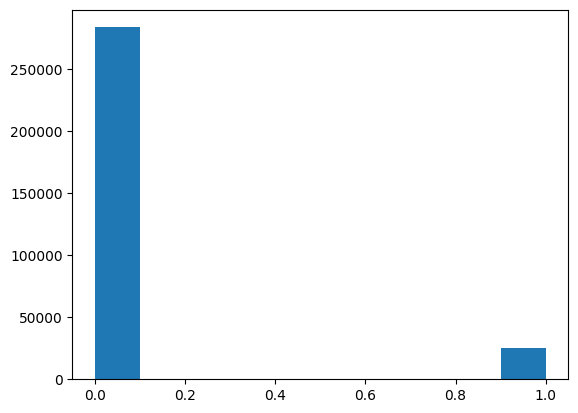

In [21]:
import matplotlib.pyplot as plt

plt.hist(target)
plt.show()

In [22]:
from my_krml_24925125.data.sets import split_sets_random

X_train, y_train, X_val, y_val, X_test, y_test = split_sets_random(features, target, test_ratio=0.1)

In [23]:
from my_krml_24925125.data.sets import save_sets

save_sets(X_train, y_train, X_val, y_val, X_test, y_test, path='../data/processed/')

## Baseline model

In [34]:
from my_krml_24925125.models.null import NullClassifier

In [35]:
from scipy.stats import mode

mode(y_train).mode

0

In [37]:
base_model = NullClassifier()

y_base = base_model.fit_predict(y_train)

In [40]:
from my_krml_24925125.models.performance import print_classifier_scores

print_classifier_scores(y_preds=y_base, y_actuals=y_train, set_name='Training')

Accuracy Training: 0.9193789915898366
F1 Training: 0.0


## SGDClassifier

In [41]:
from sklearn.linear_model import SGDClassifier

In [42]:
sgd_clf = SGDClassifier()

In [43]:
from my_krml_24925125.models.performance import fit_assess_classifier

In [47]:
sgd_clf = fit_assess_classifier(model=sgd_clf,
                                X_train=X_train,
                                y_train=y_train,
                                X_val=X_val,
                                y_val=y_val,
                               )

Accuracy Training: 0.9193789915898366
F1 Training: 0.0
Accuracy Validation: 0.9193809492974163
F1 Validation: 0.0


In [48]:
joblib.dump(sgd_clf, "../models/sgd_clf_default.joblib")

['../models/sgd_clf_default.joblib']